In [ ]:
import sys
import os

# Add parent directory to sys.path to access sibling modules like indicators/
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Overview

In [40]:
df = pd.read_csv("/home/zeal/Desktop/BizForecast/MVP/data/ASML_indicators.csv", parse_dates=['Date'])

In [41]:
print("Shape of dataset : ", df.shape)
print("\n Columns : \n", df.columns.tolist())

Shape of dataset :  (2656, 20)

 Columns : 
 ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'OBV', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26']


In [42]:
print("\n Data types : ")
print(df.dtypes)


 Data types : 
Date             datetime64[ns]
Close                   float64
High                    float64
Low                     float64
Open                    float64
Volume                    int64
RSI                     float64
OBV                     float64
BBL_20_2.0              float64
BBM_20_2.0              float64
BBU_20_2.0              float64
BBB_20_2.0              float64
BBP_20_2.0              float64
MACD_12_26_9            float64
MACDh_12_26_9           float64
MACDs_12_26_9           float64
SMA_20                  float64
SMA_50                  float64
EMA_12                  float64
EMA_26                  float64
dtype: object


In [43]:
print("\n Missing values : ")
print(df.isnull().sum())


 Missing values : 
Date             0
Close            0
High             0
Low              0
Open             0
Volume           0
RSI              0
OBV              0
BBL_20_2.0       0
BBM_20_2.0       0
BBU_20_2.0       0
BBB_20_2.0       0
BBP_20_2.0       0
MACD_12_26_9     0
MACDh_12_26_9    0
MACDs_12_26_9    0
SMA_20           0
SMA_50           0
EMA_12           0
EMA_26           0
dtype: int64


In [44]:
print("\n Descriptive stats : ")
print(df.describe())


 Descriptive stats : 
                                Date        Close         High          Low  \
count                           2656  2656.000000  2656.000000  2656.000000   
mean   2020-04-11 14:03:04.337349376   394.633242   399.088178   389.927093   
min              2015-01-02 00:00:00    70.345650    72.143560    70.073236   
25%              2017-08-21 18:00:00   142.647503   143.242754   141.301980   
50%              2020-04-13 12:00:00   285.925415   288.175131   282.981417   
75%              2022-11-29 06:00:00   655.042175   659.531522   643.969022   
max              2025-07-25 00:00:00  1088.973999  1100.012813  1066.063844   
std                              NaN   278.652603   282.122428   275.077981   

              Open        Volume          RSI           OBV   BBL_20_2.0  \
count  2656.000000  2.656000e+03  2656.000000  2.656000e+03  2656.000000   
mean    394.675237  1.016651e+06    53.726094  6.488464e+07   362.513624   
min      71.389894  9.460000e+04     

#### Price+Indicator trends

##### Price with Bollinger Bands

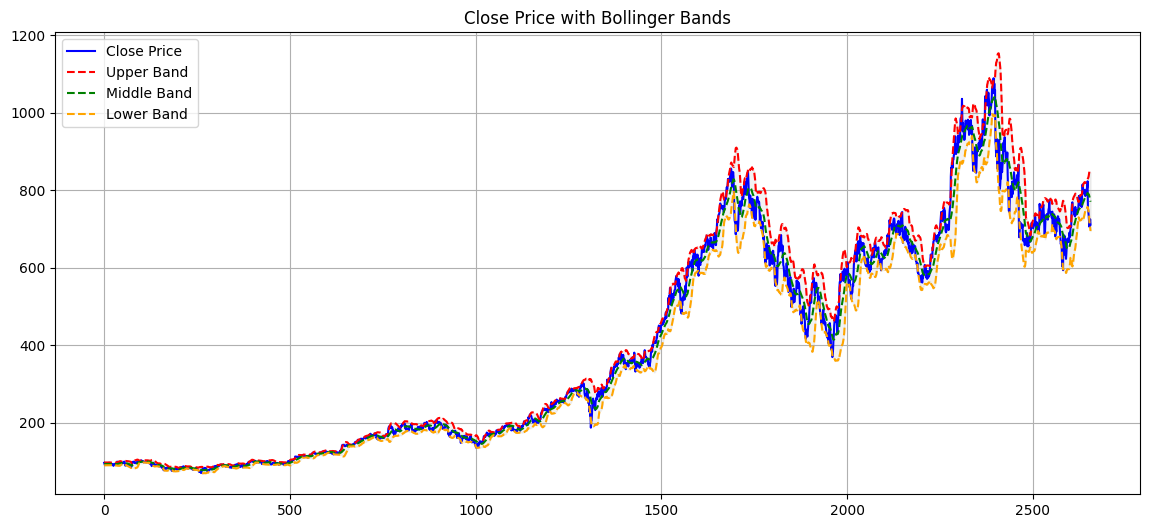

In [45]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.plot(df.index, df["BBU_20_2.0"], label="Upper Band", linestyle='--', color="red")
plt.plot(df.index, df["BBM_20_2.0"], label="Middle Band", linestyle='--', color="green")
plt.plot(df.index, df["BBL_20_2.0"], label="Lower Band", linestyle='--', color="orange")
plt.fill_between(df.index, df["BBL_20_2.0"], df["BBU_20_2.0"], color='grey', alpha=0.1)
plt.title("Close Price with Bollinger Bands")
plt.legend()
plt.grid()
plt.show()

##### RSI (Relative Strength Index)

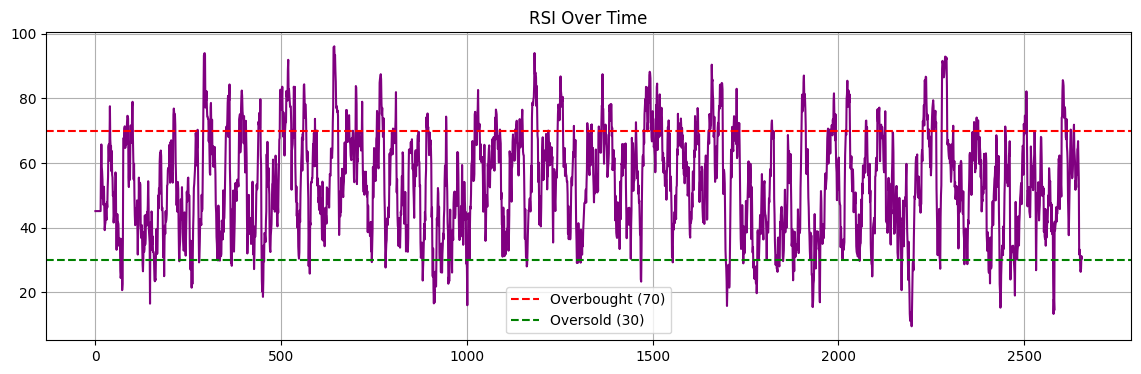

In [46]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["RSI"], color="purple")
plt.axhline(70, linestyle="--", color="red", label="Overbought (70)")
plt.axhline(30, linestyle="--", color="green", label="Oversold (30)")
plt.title("RSI Over Time")
plt.legend()
plt.grid()
plt.show()


##### MACD & Signal Line

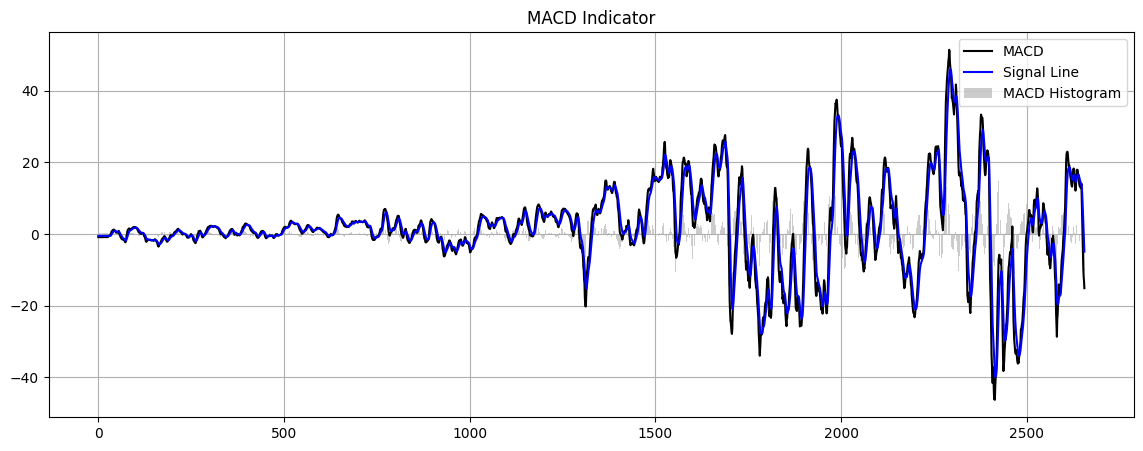

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["MACD_12_26_9"], label="MACD", color="black")
plt.plot(df.index, df["MACDs_12_26_9"], label="Signal Line", color="blue")
plt.bar(df.index, df["MACDh_12_26_9"], label="MACD Histogram", color="grey", alpha=0.4)
plt.title("MACD Indicator")
plt.legend()
plt.grid()
plt.show()


##### OBV (On-Balance Volume)

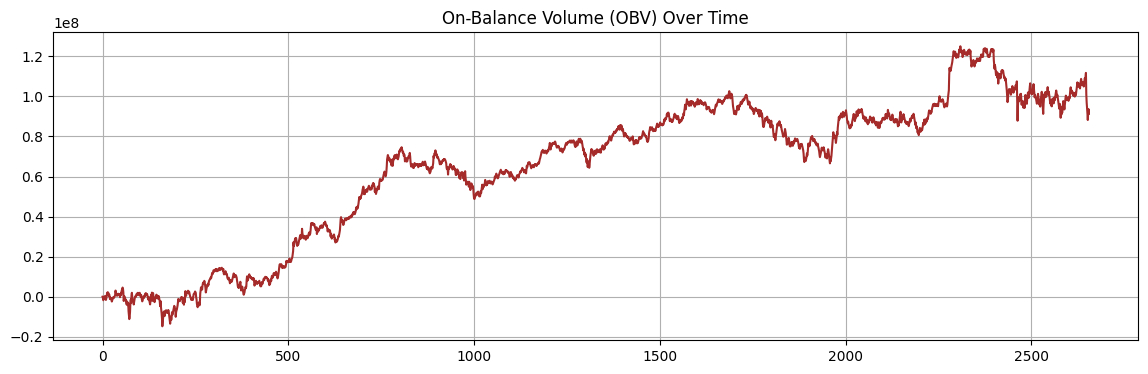

In [48]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["OBV"], color="brown")
plt.title("On-Balance Volume (OBV) Over Time")
plt.grid()
plt.show()


In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_zoomed_analysis(df, start_date, end_date, title):
    data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True, gridspec_kw={'hspace': 0.2})
    fig.suptitle(title, fontsize=16)

    # Price with BB and EMA
    axs[0].plot(data['Date'], data['Close'], label='Close Price', color='black')
    axs[0].plot(data['Date'], data['BBU_20_2.0'], label='Upper BB', color='red', linestyle='--')
    axs[0].plot(data['Date'], data['BBL_20_2.0'], label='Lower BB', color='blue', linestyle='--')
    axs[0].plot(data['Date'], data['EMA_26'], label='EMA 26', color='green', linestyle=':')
    axs[0].fill_between(data['Date'], data['BBL_20_2.0'], data['BBU_20_2.0'], color='gray', alpha=0.1)
    axs[0].set_ylabel('Price')
    axs[0].legend(loc='upper left')
    axs[0].grid(True)

    # RSI
    axs[1].plot(data['Date'], data['RSI'], color='purple')
    axs[1].axhline(70, color='red', linestyle='--', linewidth=0.8)
    axs[1].axhline(30, color='green', linestyle='--', linewidth=0.8)
    axs[1].set_ylabel('RSI')
    axs[1].grid(True)

    # MACD
    axs[2].bar(data['Date'], data['MACDh_12_26_9'], label='MACD Histogram', color='gray')
    axs[2].plot(data['Date'], data['MACD_12_26_9'], label='MACD Line', color='blue')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].set_ylabel('MACD')
    axs[2].legend(loc='upper left')
    axs[2].grid(True)

    # Volume
    axs[3].bar(data['Date'], data['Volume'], color='orange', width=1.0)
    axs[3].set_ylabel('Volume')
    axs[3].grid(True)

    # Format date axis
    axs[3].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


#### MACD, Bollinger Bands and RSI are the most sensitive to time dependednt insights

/tmp/ipykernel_269620/59586820.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])


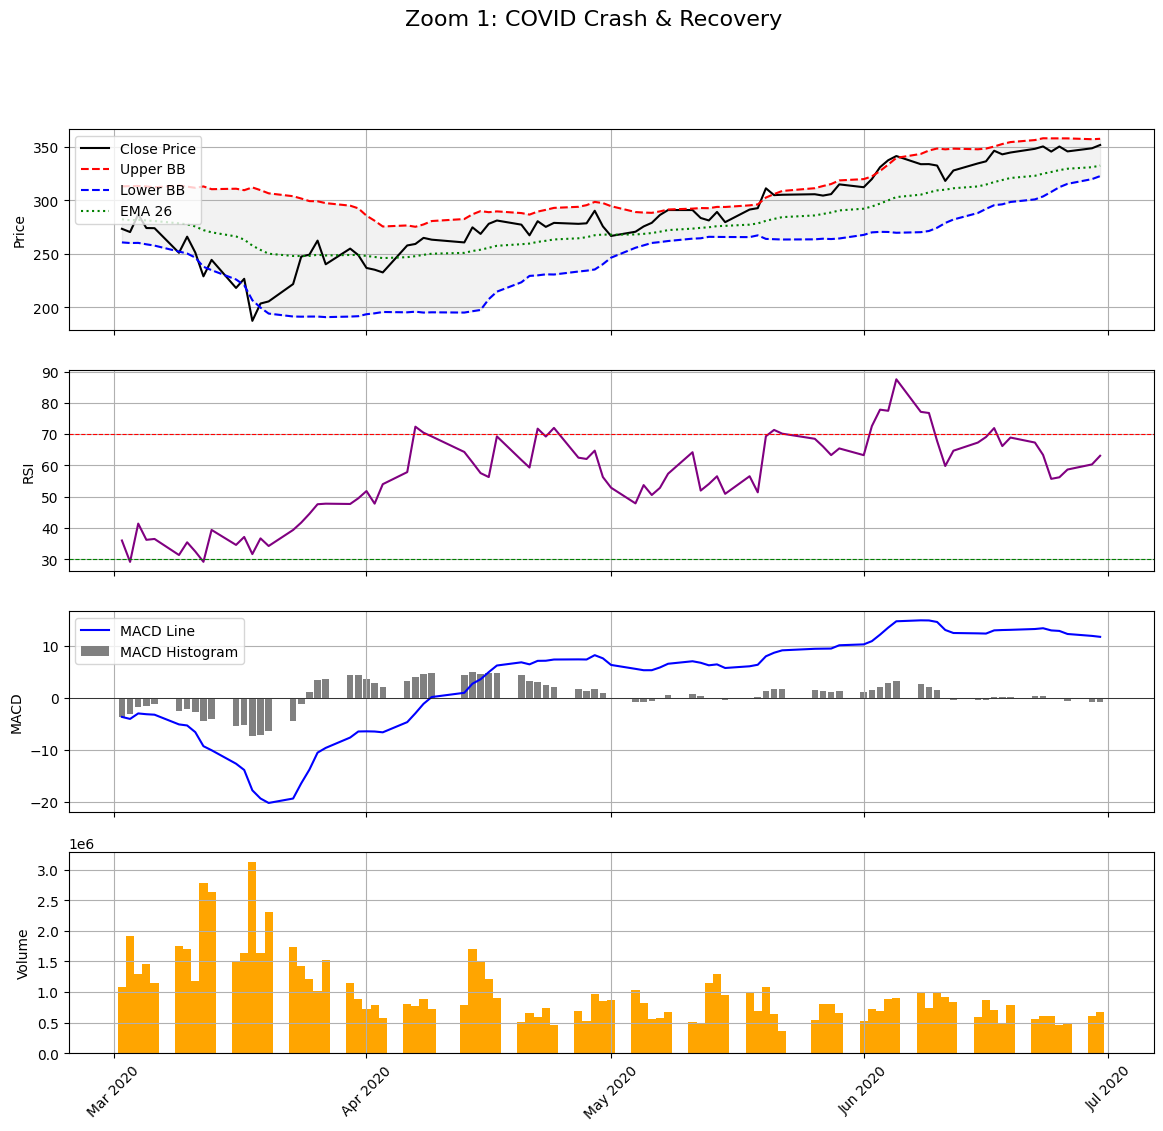

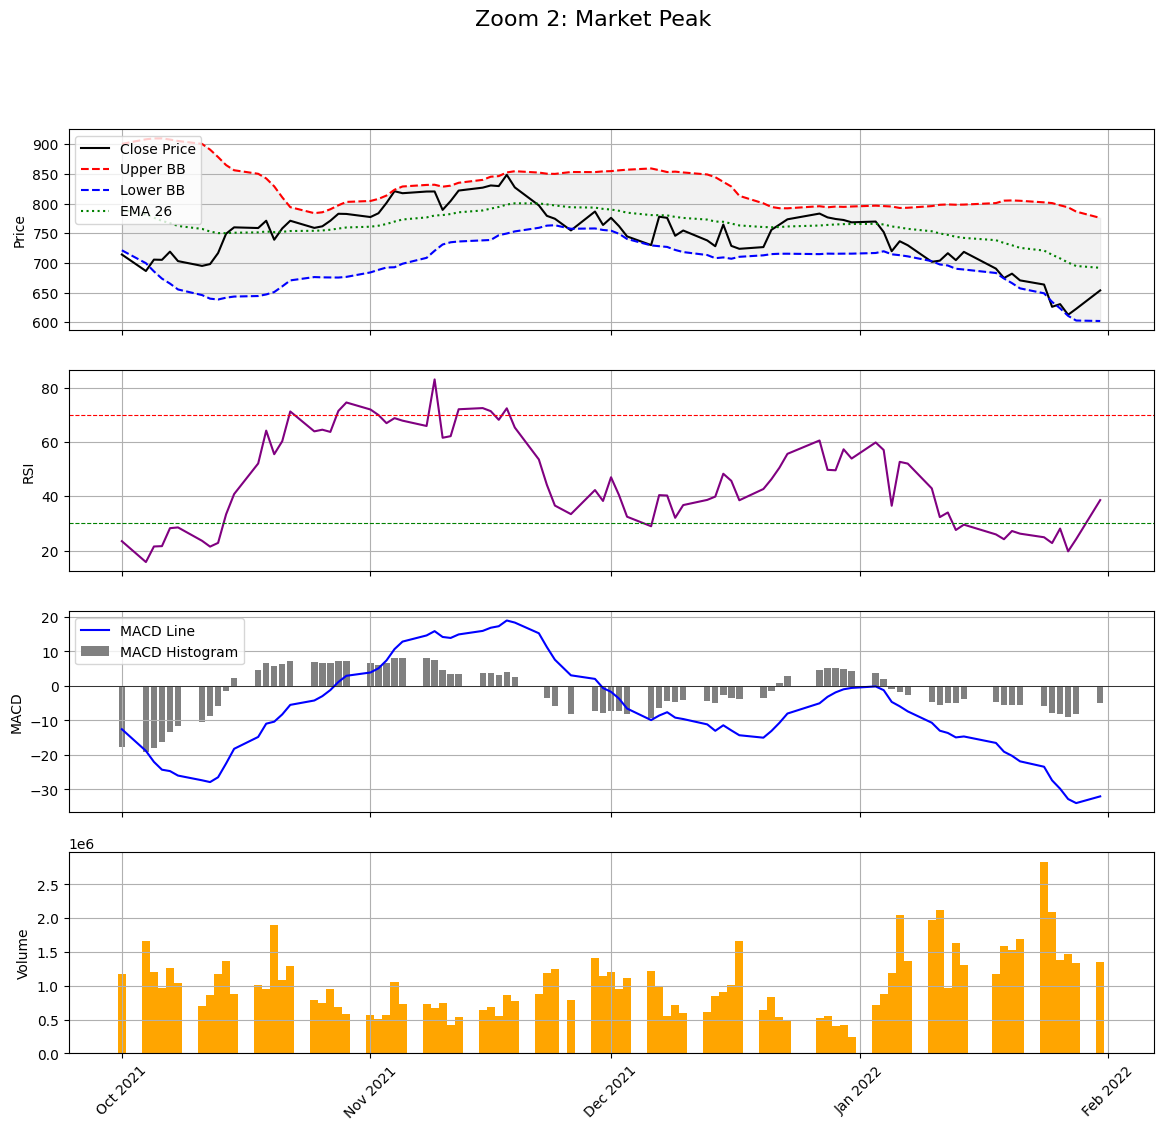

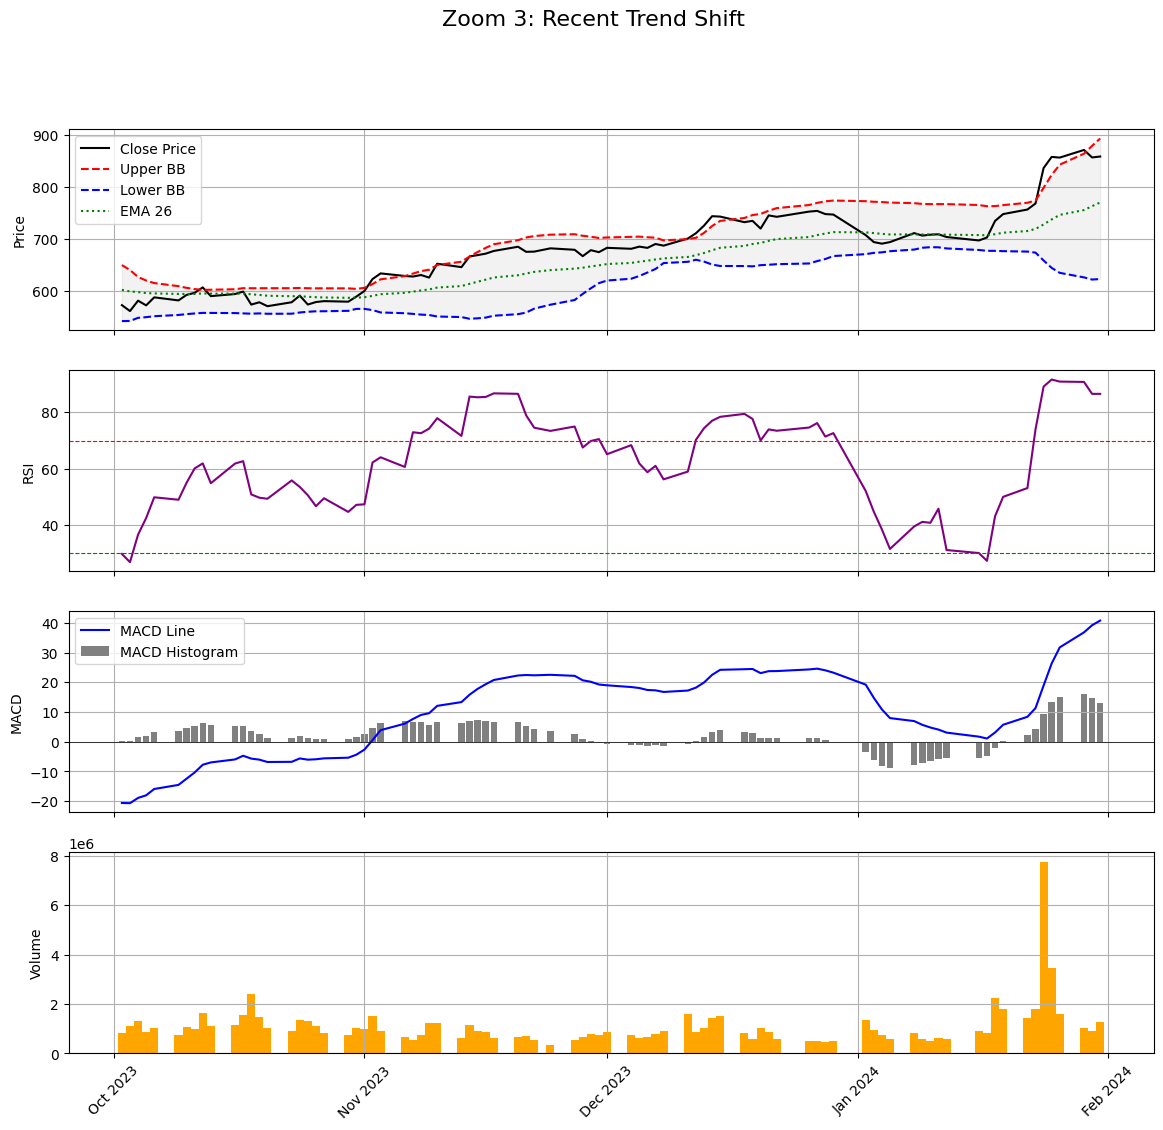

In [54]:
plot_zoomed_analysis(df, '2020-03-01', '2020-06-30', 'Zoom 1: COVID Crash & Recovery')
plot_zoomed_analysis(df, '2021-10-01', '2022-01-31', 'Zoom 2: Market Peak')
plot_zoomed_analysis(df, '2023-10-01', '2024-01-31', 'Zoom 3: Recent Trend Shift')


In [56]:
df['Buy_Signal'] = False
df['Sell_Signal'] = False

# RSI Strategy
df.loc[df['RSI'] < 30, 'Buy_Signal'] = True
df.loc[df['RSI'] > 70, 'Sell_Signal'] = True

# MACD Crossover Strategy
macd_cross_up = (df['MACD_12_26_9'] > df['MACDs_12_26_9']) & (df['MACD_12_26_9'].shift(1) <= df['MACDs_12_26_9'].shift(1))
macd_cross_down = (df['MACD_12_26_9'] < df['MACDs_12_26_9']) & (df['MACD_12_26_9'].shift(1) >= df['MACDs_12_26_9'].shift(1))

df.loc[macd_cross_up, 'Buy_Signal'] = True
df.loc[macd_cross_down, 'Sell_Signal'] = True


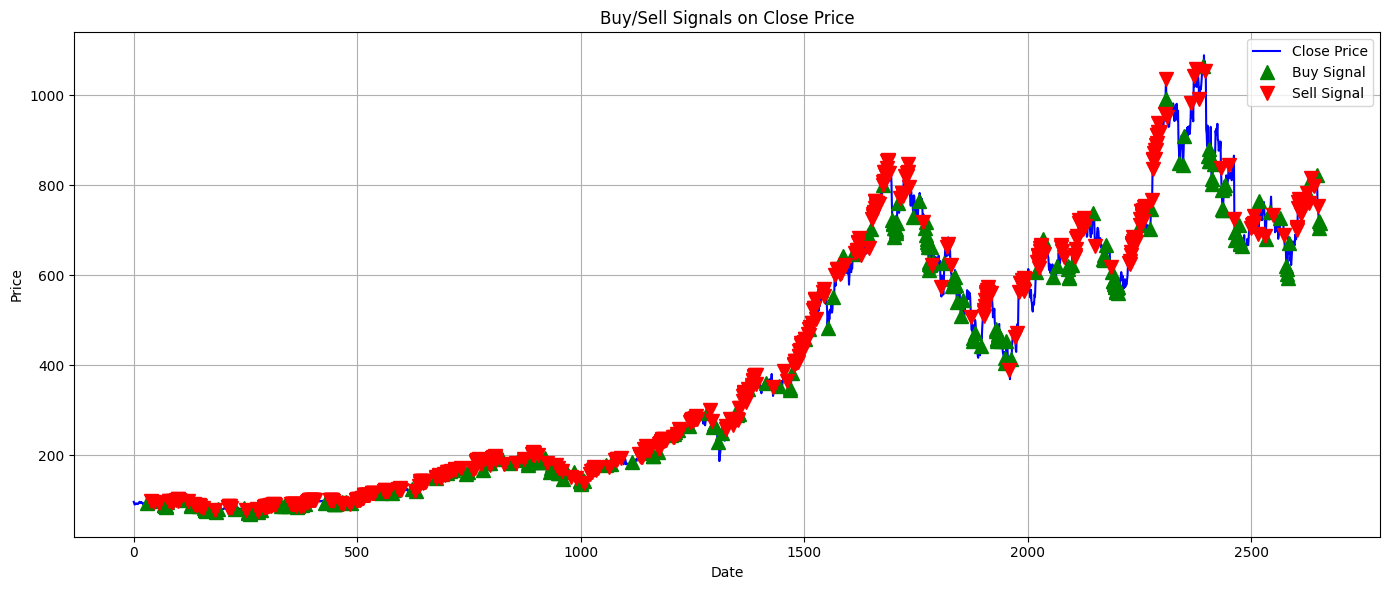

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Buy signals
plt.plot(df[df['Buy_Signal']].index, df['Close'][df['Buy_Signal']], '^', color='green', label='Buy Signal', markersize=10)

# Sell signals
plt.plot(df[df['Sell_Signal']].index, df['Close'][df['Sell_Signal']], 'v', color='red', label='Sell Signal', markersize=10)

plt.title('Buy/Sell Signals on Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#### Correlation Matrix

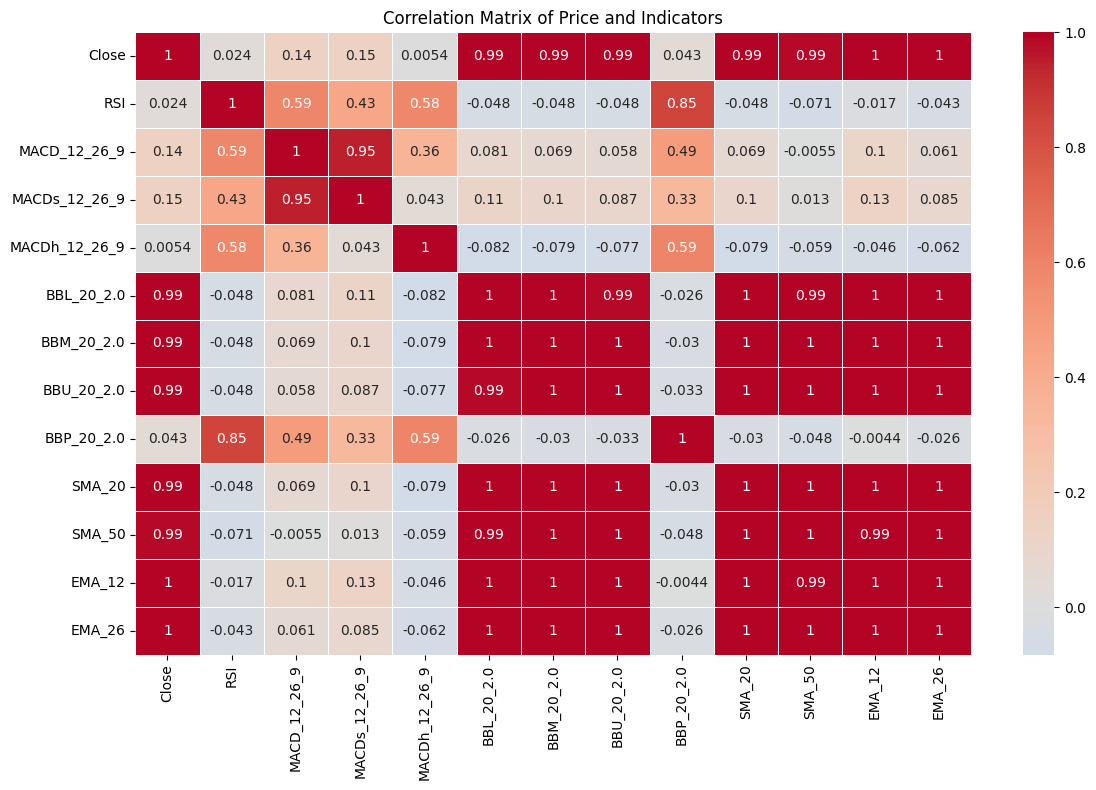

In [60]:
df_corr = df[['Close', 'RSI', 'MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9',
              'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBP_20_2.0',
              'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26']].dropna()
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Price and Indicators")
plt.tight_layout()
plt.show()

#### Thresholds

#### Volume + OBV Analysis

#### Moving Averages Crossovers

In [15]:
import matplotlib.pyplot as plt

def plot_rsi(df, title="RSI Indicator"):
    plt.figure(figsize=(12, 4))
    plt.plot(df['RSI'], label="RSI", color='blue')
    plt.axhline(70, color='red', linestyle='--', label="Overbought")
    plt.axhline(30, color='green', linestyle='--', label="Oversold")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_obv(df, title="On-Balance Volume (OBV)"):
    plt.figure(figsize=(12, 4))
    plt.plot(df['OBV'], label="OBV", color='purple')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


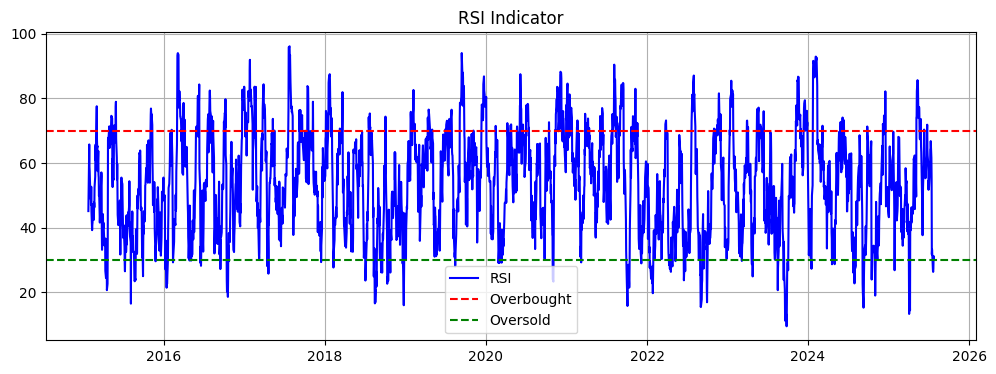

In [16]:
plot_rsi(df, title="RSI Indicator")

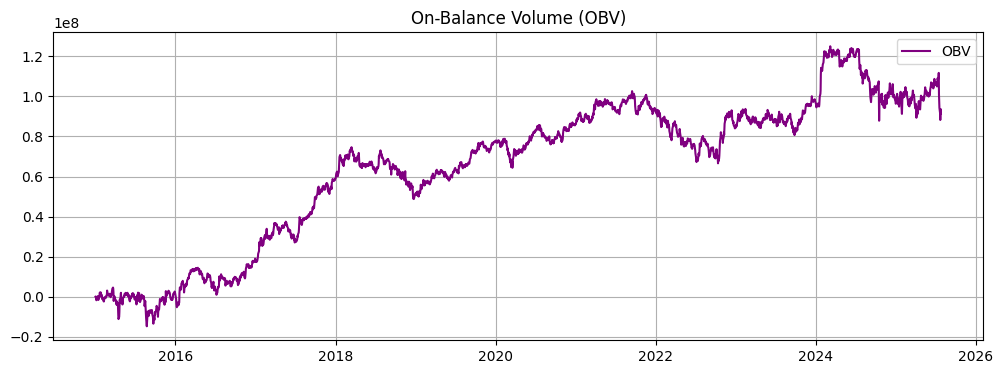

In [18]:
plot_obv(df, title="On-Balance Volume (OBV)")